# Hough transform for ID of slip bands

Hrdic data file was too large for upload to the repository. Please download it [here](https://www.dropbox.com/s/cmi87t6aflk45il/hrdicData.txt?dl=1) and then move it to the example_data_AH directory

In [2]:
#Load packages
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import spline
import copy

from quat import Quat

import ebsd
import hrdic

#Set plot behaviour. interactive grain selection has only been tested in osx display mode
%matplotlib osx

## Load data

In [3]:
#Load in DIC map
DicFilePath = "./example_data_AH/"
DicMap = hrdic.Map(DicFilePath, "hrdicData.txt")

In [4]:
#Load in EBSD map and calculate misorientation
EbsdFilePath = "./example_data_AH/ebsdData"

EbsdMap = ebsd.Map(EbsdFilePath, "cubic")
EbsdMap.binData = EbsdMap.binData[::-1]  #rotate the map 180 degrees
EbsdMap.buildQuatArray()
EbsdMap.findBoundaries(boundDef = 10)
EbsdMap.findGrains(minGrainSize=10)
EbsdMap.calcGrainMisOri(calcAxis = True)    #This line takes about 20 minutes to run but is 
                                            #required to display misorientaion
#EbsdMap.calcGrainAvOris()   #If you don't run the misoriatation calculation you need to run this instead.
                            #It takes awhile aswell but not as long as the above

## Apply crop and set homologous points

In [5]:
DicMap.setCrop(xMin=20, xMax=50, yMin=10, yMax=10)

In [6]:
### Set homologous points
#(x, y)
DicMap.homogPoints = np.array((
    (604,120),
    (1410,305),
    (953,1425),
    (1593,782),
))

EbsdMap.homogPoints = np.array((
    (180,42),
    (372,80),
    (262,341),
    (420,191),
))

## Link and display the map

In [7]:
DicMap.linkEbsdMap(EbsdMap)
DicMap.setEbsdShift(xShift=0, yShift=0)

In [8]:
DicMap.plotMaxShear(plotGBs=True)

## Define the grains

In [9]:
DicMap.findGrains(minGrainSize=10)

## Locate a grain of interest and calculate Hough transform

In [32]:
%matplotlib osx

In [10]:
DicMap.locateGrainID(displaySelected=True)

30


In [11]:
%matplotlib inline

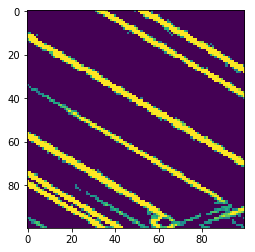

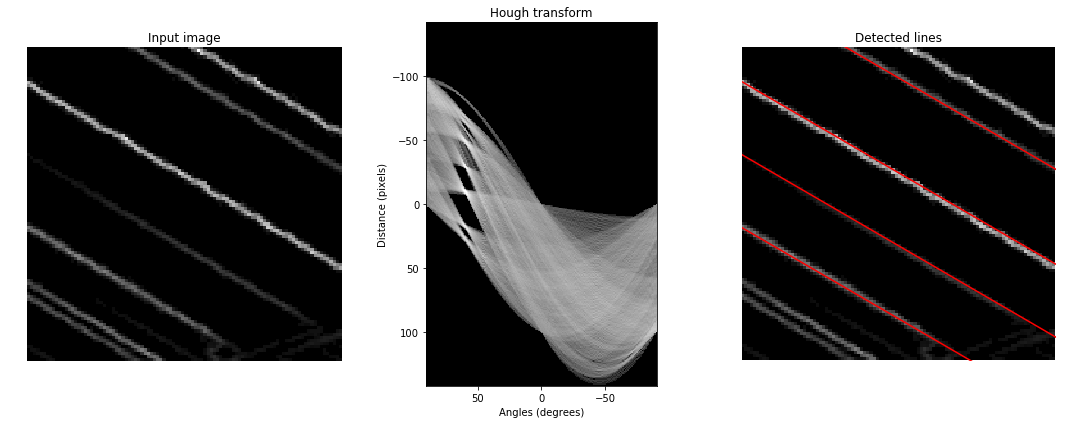

In [15]:
DicMap.grainList[DicMap.currGrainId].findSlipBands(cropXMin=100,cropXMax=200, # x crop
                                                   cropYMin=100,cropYMax=200, # y crop
                                                   strainMin=0.02) # set minimum strain to identify slip bands

In [23]:
# Issues
# - remove grain boundaries from Hough transform calculation --> remove crop keyword arguments
# - descover reason for not detecting all bands
# - automate the decision of minimum strain value using grain strain distribution --> remove strainMin keyword arg